# Modelo que irá classificar sentimentos em tweeter

In [1]:
import pandas as pd 
import numpy as np
import math
import re
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
from spacy import load
import string
import random
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf

tf.__version__
from tensorflow.keras import layers


### Pré processamento dos dados de treino ###


In [2]:
cols=['sentiment', 'id', 'date', 'query', 'user', 'text']

train_data=pd.read_csv('dados/train.csv', header=None, names= cols, engine='python', encoding='latin1')
train_data.shape

train_data.head(10)
train_data.sentiment.unique()


array([0, 4], dtype=int64)

### Plotando a contagem dos sentimentos com seaborn ##


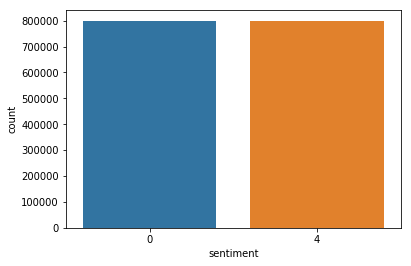

In [3]:
sns.countplot(train_data.sentiment); ## O ponto e virgula não mostra as informações do matplotlib


### Carregando os dados de teste


In [4]:
test_data=pd.read_csv('dados/test.csv', header=None, names= cols, engine='python', encoding='latin1')
test_data.shape

test_data.head(10)

test_data.sentiment.unique()


array([4, 0, 2], dtype=int64)

#### Plotando a contagem dos sentimentos com seaborn no dataset de test ##
#### Observa-se no grfico que existem tres tipos de sentimentos, um deles é o sentimento neutro #


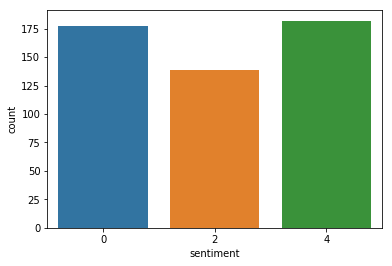

In [5]:
sns.countplot(test_data.sentiment); ## O ponto e virgula não mostra as informações do matplotlib


## LImpeza da Base de dados


In [6]:
data= train_data
data.drop(['id','date','query', 'user'], axis=1, inplace=True)
data.head()


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Variável x recebe os atributos previsores da coluna 1, os textos ##


In [7]:
x=data.iloc[:,1].values

x.shape # é necessário esta no formato numpy array, para treinar a rede neural



(1600000,)

#### Variável y recebe as targets a coluna 0 ###


In [8]:
y=data.iloc[:, 0].values


##### Iremos escolher apenas uma parte dos dados para treinamento


In [9]:
from sklearn.model_selection import train_test_split
x, _, y, _=train_test_split(x, y, test_size=0.85, stratify=y) # stratfy iguala o resultado das classes com a mesma medida


In [10]:
# vamos fazer uma contagem
unique, counts =np.unique(y, return_counts=True)
unique, counts


(array([0, 4], dtype=int64), array([120000, 120000], dtype=int64))

## criando a função clean tweet


In [11]:
def clean_tweets(tweet):
    tweet=BeautifulSoup(tweet,'lxml').get_text()
    tweet=re.sub(r"@[A-Za-z0-9]+", " ", tweet) # o sinal '+ ' indica que pode ser qualquer uma das letras
    tweet=re.sub(r"https?://[A-Za-z0-9./]+"," ", tweet) # o '?' indica que pode ser ou não seguido de 's'
    tweet=re.sub(r" +",' ', tweet) # retirando numero
    
    return tweet


In [12]:
## Testando a função clean_tweets ###
texto="@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
texto=clean_tweets(texto)  
texto


" - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"

### Spacy para remover stopwords, que são palavras sem significado


In [15]:

nlp= sp.load("pt") ## 'en' de inglês, se fossemos trabalhara com portugues iriamos usar 'pt'
nlp

#stop_words= sp.lang.en.STOP_WORDS


OSError: [E050] Can't find model 'pt'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.